In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("/content/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.loc[df.duplicated()] # duplicate rows 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [4]:
df.isnull().sum() #total null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

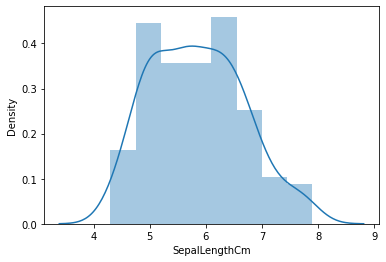

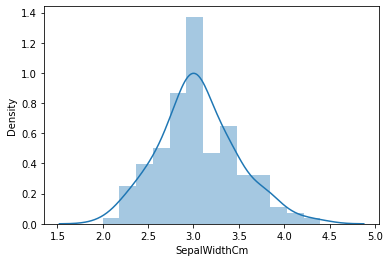

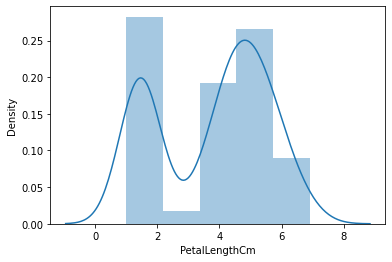

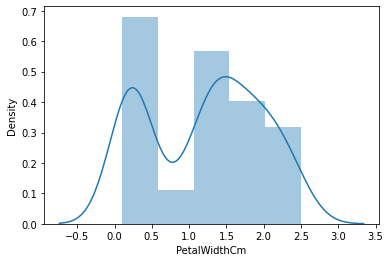

In [5]:
#dist for numerical attributes
for i, col in enumerate(df.iloc[:,1:-1].columns):
    plt.figure(i)
    sns.distplot(df[col])

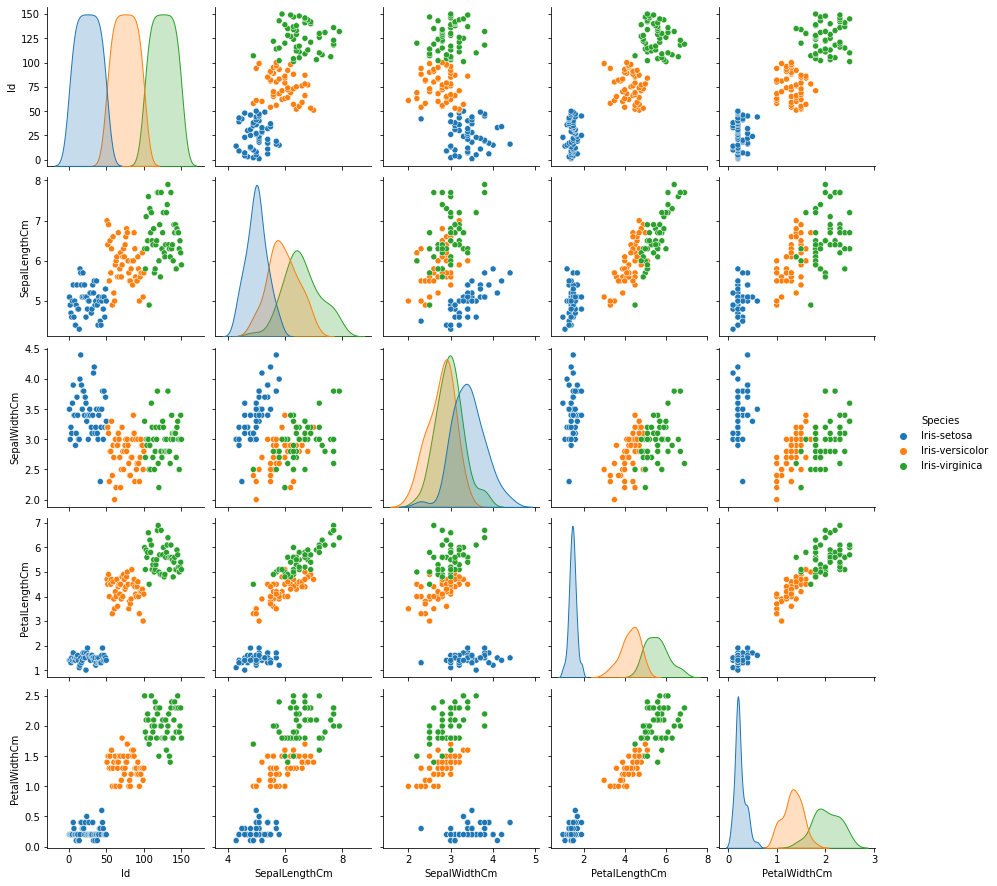

In [6]:
sns.pairplot(df,hue='Species')

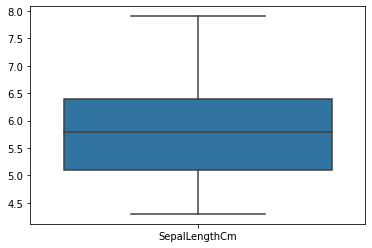

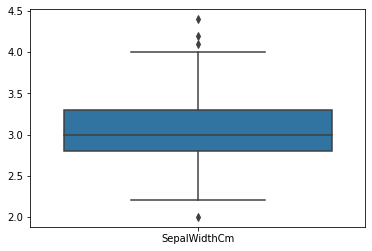

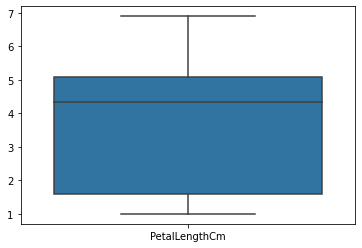

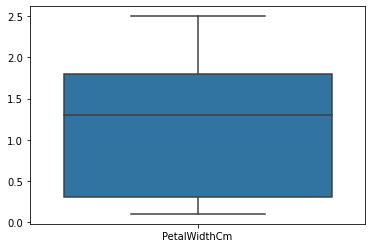

In [7]:
#box plot 
for column in df.iloc[:, 1:-1]:
  sns.boxplot(data = df[[column]])
  plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit & transform data
scaled_data = scaler.fit(df.iloc[:,1:-1])
temp_df = scaled_data.transform(df.iloc[:,1:-1])

In [9]:
df.iloc[:,1:-1] = temp_df

In [10]:
#remove outlier
def remove_outlier(my_column,df):
  '''
  remove outliers from all columns
  find upper & lower limit for data points 
  delete outliers inplace    
  
  input: single column(pandas series)
         dataframe(pandas dataframe)
  return: None
     
  '''
  #outliers range = column mean + or - (3 * standard deviation of columns)
  upper_limit_outlier = df[my_column].mean() + (3*df[my_column].std())
  lower_limit_outlier = df[my_column].mean() - (3*df[my_column].std())

  df.drop(df[df[my_column] > upper_limit_outlier].index, inplace = True) # upper limit outliers
  df.drop(df[df[my_column] < lower_limit_outlier].index, inplace = True) # lower limit outliers

for col in df.iloc[:,1:-1]:
    remove_outlier(col,df)

In [11]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,2,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,3,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,4,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,5,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
...,...,...,...,...,...,...
145,146,1.038005,-0.124958,0.819624,1.447956,Iris-virginica
146,147,0.553333,-1.281972,0.705893,0.922064,Iris-virginica
147,148,0.795669,-0.124958,0.819624,1.053537,Iris-virginica
148,149,0.432165,0.800654,0.933356,1.447956,Iris-virginica


In [12]:
target = df['Species'] # target variable
df = df.drop(['Id','Species',],axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [13]:
print(target.unique())


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [14]:
target.map({'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2}) #assign label to each class

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 149, dtype: int64

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df,target, 
                                                    test_size = 0.25, 
                                                    random_state = 4,
                                                    stratify= target)

In [16]:
print(x_train.shape) 
print(x_test.shape)

(111, 4)
(38, 4)


# multilayer perceptron
universal function approximator 
1. input <br>
weight initialization
2. input*weight
3. bias
4. activation

5. loss function(log loss/binary cross entropy)
6. gradient descent
7. SGD, Adam, Adagrad, Adadelta <br>
learning rate <br>
weight update <br>



In [17]:

from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50),
                    activation = 'relu',
                    solver='adam',
                    batch_size = 100,
                    learning_rate = 'adaptive',
                    max_iter=100,
                    shuffle = True,
                    verbose = True,
                    early_stopping = True,
                    validation_fraction = 0.2,
                    random_state=36)

In [18]:
mlp.fit(x_train, y_train)

Iteration 1, loss = 1.10997571
Validation score: 0.304348
Iteration 2, loss = 1.04875556
Validation score: 0.521739
Iteration 3, loss = 0.99227104
Validation score: 0.565217
Iteration 4, loss = 0.93804827
Validation score: 0.565217
Iteration 5, loss = 0.88669803
Validation score: 0.565217
Iteration 6, loss = 0.84040268
Validation score: 0.565217
Iteration 7, loss = 0.79726329
Validation score: 0.565217
Iteration 8, loss = 0.75610364
Validation score: 0.608696
Iteration 9, loss = 0.71651850
Validation score: 0.608696
Iteration 10, loss = 0.67858434
Validation score: 0.608696
Iteration 11, loss = 0.64250077
Validation score: 0.652174
Iteration 12, loss = 0.60840087
Validation score: 0.695652
Iteration 13, loss = 0.57617257
Validation score: 0.782609
Iteration 14, loss = 0.54589034
Validation score: 0.782609
Iteration 15, loss = 0.51755036
Validation score: 0.782609
Iteration 16, loss = 0.49129387
Validation score: 0.782609
Iteration 17, loss = 0.46705551
Validation score: 0.782609
Iterat

MLPClassifier(activation='relu', alpha=0.0001, batch_size=100, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(150, 100, 50), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=36, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.2, verbose=True,
              warm_start=False)

In [19]:
y_pred = mlp.predict(x_test)

In [20]:
accuracy_score(y_test,y_pred)

0.9473684210526315

[[1.         0.         0.        ]
 [0.         0.84615385 0.15384615]
 [0.         0.         1.        ]]


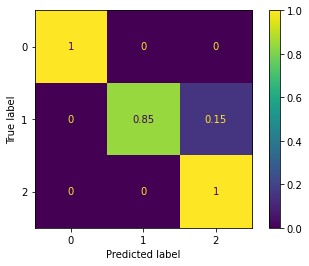

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(mlp, x_test, y_test,
                                 display_labels=[0,1,2],
                                 normalize = 'true')
print(disp.confusion_matrix)
plt.show()

In [22]:
import pickle
filename = 'mlp_model.sav'
pickle.dump(mlp, open(filename, 'wb'))

In [24]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))